<a href="https://colab.research.google.com/github/dhivyasreedhar/FakeTweetDetection/blob/main/twitter_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import re
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
#loading dataset

data = pd.read_csv('/content/train1.csv',encoding='mac_roman')
test_data = pd.read_csv('/content/test1.csv',encoding='mac_roman')

In [5]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [6]:
#viewing data
data.tail()

,id,tweet,label
10417,10418,@ayogo_do @Kaashin1 @BosmaTon @solo_ambuku @Ma...,0
10418,10419,RT @Jimmymack010: The virus is engineered The ...,0
10419,10420,La cosa va de esto....China developing 9 poten...,0
10420,10421,RT @BreezyxSupreme: THE CURE TO THE CORONAVIRU...,0
10421,10422,@432wps @VNotKind @cla83674019 @Bossina8 @lhas...,0


In [7]:
#viewing data
test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10422 non-null  int64 
 1   tweet   10422 non-null  object
 2   label   10422 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 244.4+ KB


In [9]:
data.shape

(10422, 3)

In [10]:
test_data.shape

(2140, 2)

In [11]:
data.duplicated().sum()

0

In [12]:
test_data.duplicated().sum()

0

In [13]:
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

In [14]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

In [15]:
target_data = data['label']
target_data = np.array(target_data)
target_data

array([1, 1, 0, ..., 0, 0, 0])

In [16]:
text_data = data.tweet.values
text_data

array(['The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.',
       'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux',
       'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville',
       ...,
       'La cosa va de esto....China developing 9 potential vaccines in global race for coronavirus cure | South China Morning Post https://t.co/wX0jRDxm7Y',
       'RT @BreezyxSupreme: THE CURE TO THE CORONAVIRUS IS DICK ENLARGEMENT PILLS! https://t.co/qrlHMZe9wl',
       '@432wps @VNotKind @cla83674019 @Bossina8 @lhasadv @TapuMana @FernandaVigagni @manuelabadawy What scares me is the fact that Indian research has found HIV sequencing in this corona virus strain. That to me, screams man made bioweapo

In [17]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [18]:
test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


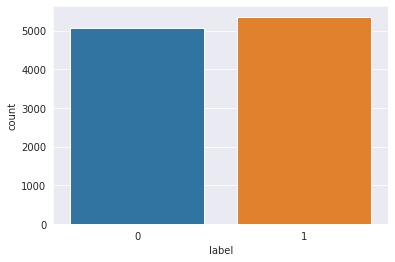

In [19]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x=data.label)
plt.show()

In [20]:
#Text Preprocessing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#(1) Remove #, @chunk, urls, shortwords(length is either 1 or 2), stopwords
at_chunk = re.compile(r"@[a-zA-Z0-9]*")
url = re.compile(r"https?:/+[a-zA-Z0-9./]*")
shortword = re.compile(r"\b\w{1,2}\b")

stop_words = set(stopwords.words('english'))

def clean(text):
    text = re.sub('#','',text)
    text = re.sub(at_chunk,'',text)
    text = re.sub(url,'',text)
    text = re.sub(shortword,'',text)
    
    text = text.split()
    text = [w for w in text if w not in stop_words]
    
    text = " ".join(text)
    text = text.strip()
    
    return text

In [22]:
data.tweet = data.tweet.apply(clean)

In [23]:
data.tweet.head()

0    The CDC currently reports 99031 deaths. genera...
1    States reported 1121 deaths small rise last Tu...
2    Politically Correct Woman (Almost) Uses Pandem...
3    IndiaFightsCorona: 1524 COVID testing laborato...
4    Populous states generate large case counts loo...
Name: tweet, dtype: object

In [24]:
test_data.tweet = test_data.tweet.apply(clean)

In [25]:
test_data.tweet.head()

0    Our daily update published. States reported 73...
1                                 Alfalfa cure COVID-.
2    President Trump Asked What Would Were Catch Th...
3    States reported 630 deaths. still seeing solid...
4    This sixth time global health emergency declar...
Name: tweet, dtype: object

In [26]:
#2 Check NULL
data.tweet.isnull().any()

False

In [27]:
test_data.tweet.isnull().any()

False

In [28]:
#3 Tokenizer
tok = Tokenizer()

train_tweet = data.tweet
train_label = data.label
test_tweet = test_data.tweet

tok.fit_on_texts(train_tweet)

word_size = len(tok.index_word)
vocab_size = word_size+1

print(f"{word_size} words are used!")

print("Tokenizing train texts\n")
train_tweet = tok.texts_to_sequences(train_tweet)
print("Tokenizing train texts finished!\n")

print("Tokenizng test texts with the same tokenizer\n")
test_tweet = tok.texts_to_sequences(test_tweet)
print("Tokenizing test texts finished!\n")

18845 words are used!
Tokenizing train texts

Tokenizing train texts finished!

Tokenizng test texts with the same tokenizer

Tokenizing test texts finished!



Max of sequence size >> 884
Average of sequence size >> 16


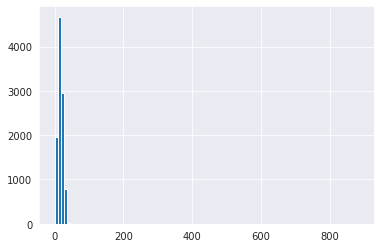

In [29]:
#4 padding
lengths = [len(s) for s in train_tweet]
print(f"Max of sequence size >> {np.max(lengths)}")
print(f"Average of sequence size >> {int(np.round(np.mean(lengths)))}")

plt.hist(lengths,bins=100)
plt.show()

sequence_size=21

In [30]:
train_tweet = pad_sequences(train_tweet,maxlen=sequence_size,padding='post',truncating='post')
test_tweet = pad_sequences(test_tweet,maxlen=sequence_size,padding='post',truncating='post')

print(f"train text shape >> {train_tweet.shape}")
print(f"test text shape >> {test_tweet.shape}")

train text shape >> (10422, 21)
test text shape >> (2140, 21)


In [31]:
train_data = train_tweet
test_data = test_tweet

In [32]:
#Bidirectional stacked LSTM without pre-trained Embedding Vectors from GLOVE : return only last hidden cell on the last lstm layer
from keras.layers import Input,Embedding,Bidirectional,LSTM,TimeDistributed,Dense,Dropout,BatchNormalization,GlobalMaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from keras.models import Model

#vocab_size
#sequence_size
word_vec_size = 128
hidden_size = 128

def create_lstm1():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=False))(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [33]:
lstm1 = create_lstm1()
hist = lstm1.fit(train_data,train_label,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
294/294 [==============================] - 73s 201ms/step - loss: 0.3430 - accuracy: 0.8514 - val_loss: 0.7024 - val_accuracy: 0.5235
Epoch 2/10
294/294 [==============================] - 55s 186ms/step - loss: 0.1145 - accuracy: 0.9569 - val_loss: 0.2677 - val_accuracy: 0.8869
Epoch 3/10
294/294 [==============================] - 54s 185ms/step - loss: 0.0578 - accuracy: 0.9790 - val_loss: 0.3636 - val_accuracy: 0.8802
Epoch 4/10
294/294 [==============================] - 54s 184ms/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.2022 - val_accuracy: 0.9377
Epoch 5/10
294/294 [==============================] - 54s 185ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.3319 - val_accuracy: 0.8965
Epoch 6/10
294/294 [==============================] - 54s 185ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.5293 - val_accuracy: 0.8686
Epoch 7/10
294/294 [==============================] - 55s 186ms/step - loss: 0.0298 - accuracy: 0.9899 - val_loss: 0.1758 - val_ac

In [34]:
#Bidirectional Stacked LSTM model without using pre-trained Embedding Vectors : return all the hidden cells and use global average pooling
def create_lstm2():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = GlobalAveragePooling1D()(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [35]:
lstm2 = create_lstm2()
hist = lstm2.fit(train_data,train_label,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
294/294 [==============================] - 74s 204ms/step - loss: nan - accuracy: 0.4511 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
294/294 [==============================] - 54s 184ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
294/294 [==============================] - 54s 185ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
294/294 [==============================] - 55s 186ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
294/294 [==============================] - 55s 186ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
294/294 [==============================] - 55s 186ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
294/294 [==============================] - 55s 186ms/step - loss: nan - accuracy: 0.4284 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
294/294 [=======

In [36]:
#Bidirectional Stacked LSTM model without using pre-trained Embedding Vectors : return all the hidden cells and use global max pooling
def create_lstm3():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = GlobalMaxPool1D()(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [37]:
lstm3 = create_lstm3()
hist = lstm3.fit(train_data,train_label,validation_split=0.1,epochs=7,batch_size=32)

Epoch 1/7
294/294 [==============================] - 74s 202ms/step - loss: 0.3531 - accuracy: 0.8421 - val_loss: 1.1150 - val_accuracy: 0.0038
Epoch 2/7
294/294 [==============================] - 55s 187ms/step - loss: 0.1252 - accuracy: 0.9543 - val_loss: 0.2789 - val_accuracy: 0.8811
Epoch 3/7
294/294 [==============================] - 55s 188ms/step - loss: 0.0606 - accuracy: 0.9797 - val_loss: 0.3680 - val_accuracy: 0.8696
Epoch 4/7
294/294 [==============================] - 55s 188ms/step - loss: 0.0363 - accuracy: 0.9876 - val_loss: 0.2147 - val_accuracy: 0.9425
Epoch 5/7
294/294 [==============================] - 56s 191ms/step - loss: 0.0324 - accuracy: 0.9907 - val_loss: 0.2589 - val_accuracy: 0.9348
Epoch 6/7
294/294 [==============================] - 55s 188ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.2444 - val_accuracy: 0.9425
Epoch 7/7
294/294 [==============================] - 55s 189ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.3755 - val_accuracy: